In [6]:
from platform import python_implementation, python_version_tuple

print(python_implementation())

for atr in python_version_tuple():
    print(atr)

CPython
3
7
5


In [1]:
#### reading the textfiles(captions)

In [2]:
def readText(path):
    with open(path) as f:
        captions=f.read()
        
    return captions

In [3]:
captions=readText("./flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt")
captions=captions.split("\n")[:-1] ### discarding the last line
###### last line is empty

In [4]:
len(captions) ############ here we can easily read the caption

40460

In [5]:
print(captions[0])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .


In [6]:
first,second=captions[0].split('\t')
print(first)
print(second)
print(first.split('.')[0])

1000268201_693b08cb0e.jpg#0
A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e


In [7]:
#### lets create a dictionary to map each image with the list of captions it has
dictionary={}  ## dictionary for mapping

for cap in captions:
    first,second=cap.split('\t')
    img_name=first.split('.')[0]
    
    
    ### if the image id is already present or not
    if dictionary.get(img_name) is None:
        dictionary[img_name]=[]  ## here with particular img if no caption is added the we initialise with empty list
        
        
    dictionary[img_name].append(second) ### if the image is already present than add it to a list

In [8]:
dictionary["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [9]:
img_path="flickr8k/Flickr_Data/Flickr_Data/Images/"

In [10]:
import cv2
import matplotlib.pyplot as plt


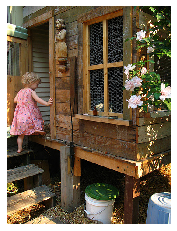

In [11]:
img=cv2.imread(img_path+"1000268201_693b08cb0e.jpg")
img_=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_)
plt.axis("OFF")
plt.show()

### data cleaning





In [23]:
### here we should not remove stopwords does not do stemming to produce correct caption

### cleaning the text
def clean_text(sentence):
    sentence=sentence.lower() ### so that "the The" remain same
    sentence=re.sub("[^a-z]+"," ",sentence)  ### subsitute space if any of charcater is present other alphabets
    sentence=sentence.split()  ## splitting the sentence into words
    print(sentence)
    sentence=[s for s in sentence if len(s)>1]
    sentence=" ".join(sentence)  ## joining it again
    return sentence

In [24]:
clean_text("A cat is sitting  22 33  44 33  ## over the tree @")

['a', 'cat', 'is', 'sitting', 'over', 'the', 'tree']


'cat is sitting over the tree'

In [30]:
import re

In [31]:
################################# cleaning all the captions

for key,caption_list in dictionary.items():
    #print(key,caption_list)
    for i in range(len(caption_list)):
        caption_list[i]=clean_text(caption_list[i])
        


['child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way']
['girl', 'going', 'into', 'wooden', 'building']
['little', 'girl', 'climbing', 'into', 'wooden', 'playhouse']
['little', 'girl', 'climbing', 'the', 'stairs', 'to', 'her', 'playhouse']
['little', 'girl', 'in', 'pink', 'dress', 'going', 'into', 'wooden', 'cabin']
['black', 'dog', 'and', 'spotted', 'dog', 'are', 'fighting']
['black', 'dog', 'and', 'tri', 'colored', 'dog', 'playing', 'with', 'each', 'other', 'on', 'the', 'road']
['black', 'dog', 'and', 'white', 'dog', 'with', 'brown', 'spots', 'are', 'staring', 'at', 'each', 'other', 'in', 'the', 'street']
['two', 'dogs', 'of', 'different', 'breeds', 'looking', 'at', 'each', 'other', 'on', 'the', 'road']
['two', 'dogs', 'on', 'pavement', 'moving', 'toward', 'each', 'other']
['little', 'girl', 'covered', 'in', 'paint', 'sits', 'in', 'front', 'of', 'painted', 'rainbow', 'with', 'her', 'hands', 'in', 'bowl']
['little', 'girl', 'is', 'si

['young', 'boy', 'is', 'running', 'on', 'picnic', 'tables', 'at', 'park']
['the', 'boy', 'hops', 'from', 'one', 'picnic', 'table', 'to', 'the', 'other', 'in', 'the', 'park']
['woman', 'crouches', 'down', 'next', 'to', 'her', 'terrier', 'dog', 'to', 'smile', 'at', 'little', 'girl', 'sitting', 'on', 'the', 'sidewalk']
['woman', 'in', 'red', 'top', 'and', 'small', 'dog', 'talks', 'to', 'young', 'girl']
['woman', 'showing', 'small', 'dog', 'to', 'an', 'infant']
['woman', 'squatting', 'to', 'face', 'small', 'child', 'while', 'holding', 'dog']
['woman', 'with', 'brown', 'dog', 'is', 'talking', 'to', 'toddler', 'who', 'is', 'sat', 'on', 'the', 'ground']
['female', 'artist', 'showing', 'her', 'painting', 'and', 'signing', 'paper']
['man', 'on', 'phone', 'and', 'woman', 'sitting', 'near', 'painting']
['woman', 'drawing', 'portrait', 'while', 'man', 'on', 'cellphone', 'watches']
['woman', 'writing', 'on', 'notepad', 'near', 'portrait', 'outdoors']
['standing', 'man', 'on', 'phone', 'with', 'seat

['chocolate', 'brown', 'dog', 'running', 'on', 'grass', 'with', 'something', 'in', 'its', 'mouth']
['the', 'dog', 'is', 'running', 'with', 'food', 'in', 'his', 'mouth']
['the', 'two', 'girls', 'are', 'playing', 'on', 'yellow', 'and', 'red', 'jungle', 'gym']
['two', 'girls', 'play', 'at', 'park']
['two', 'little', 'girls', 'both', 'dressed', 'in', 'pink', 'play', 'on', 'the', 'jungle', 'gym']
['two', 'little', 'girls', 'in', 'pink', 'are', 'in', 'playground']
['two', 'young', 'girls', 'wearing', 'pink', 'playing', 'on', 'playground']
['baseball', 'batter', 'raising', 'his', 'arm']
['baseball', 'player', 'from', 'new', 'york', 'waiting', 'to', 'bat', 'during', 'game']
['baseball', 'player', 'in', 'yankees', 'uniform', 'is', 'holding', 'bat', 'in', 'one', 'hand']
['new', 'york', 'yankee', 'holds', 'up', 'bat']
['new', 'york', 'yankee', 'warming', 'up']
['two', 'girls', 'in', 'pink', 'are', 'playing', 'on', 'yellow', 'playground', 'bars']
['two', 'girls', 'on', 'jungle', 'gym']
['two', 'li

['three', 'people', 'hiking', 'up', 'mountain', 'with', 'river', 'and', 'other', 'mountains', 'in', 'the', 'background']
['two', 'dachshunds', 'one', 'black', 'the', 'other', 'brown', 'run', 'on', 'grass']
['two', 'dachshunds', 'run', 'in', 'the', 'grass', 'with', 'blue', 'ball']
['two', 'dogs', 'chase', 'blue', 'ball', 'in', 'field']
['two', 'small', 'dogs', 'are', 'chasing', 'ball']
['two', 'small', 'dogs', 'playing', 'in', 'field', 'with', 'small', 'ball']
['brown', 'dog', 'playing', 'with', 'tennis', 'ball']
['brown', 'dog', 'reaches', 'for', 'tennis', 'ball']
['gray', 'dog', 'is', 'looking', 'at', 'ball', 'in', 'the', 'air']
['large', 'skinny', 'dog', 'is', 'trying', 'to', 'catch', 'faded', 'green', 'tennis', 'ball']
['brown', 'dog', 'catches', 'ball', 'in', 'sunny', 'yard']
['man', 'cleaning', 'the', 'inside', 'of', 'large', 'pane', 'of', 'glass']
['man', 'holds', 'up', 'blue', 'cloth', 'and', 'smiles']
['man', 'is', 'holding', 'up', 'plastic', 'jug', 'indoors']
['man', 'smiles',

['two', 'white', 'dogs', 'walking', 'in', 'the', 'snow']
['two', 'white', 'dogs', 'walk', 'through', 'huge', 'bank', 'of', 'mountain', 'snow']
['black', 'and', 'white', 'dog', 'playing', 'in', 'the', 'snow', 'together']
['black', 'poodle', 'jumping', 'on', 'the', 'head', 'of', 'white', 'poodle', 'while', 'walking', 'in', 'the', 'snow']
['black', 'dog', 'jumping', 'over', 'white', 'dog', 'in', 'snowy', 'path']
['two', 'dogs', 'playing', 'in', 'the', 'snow']
['two', 'poodles', 'are', 'running', 'through', 'the', 'snow']
['black', 'dog', 'is', 'jumping', 'into', 'the', 'water', 'off', 'dock']
['black', 'dog', 'jumping', 'into', 'the', 'water']
['black', 'dog', 'jumps', 'off', 'pier', 'into', 'lake']
['dog', 'leaps', 'off', 'dock', 'and', 'into', 'the', 'water']
['the', 'black', 'dog', 'leaps', 'off', 'the', 'dock', 'and', 'into', 'the', 'water']
['child', 'is', 'wading', 'through', 'water', 'towards', 'the', 'beach']
['small', 'african', 'boy', 'leaves', 'the', 'ocean', 'while', 'many', '

['man', 'jumps', 'through', 'the', 'air', 'while', 'snowboarding']
['snowboarder', 'in', 'gray', 'pants', 'and', 'white', 'jacket', 'catches', 'some', 'air']
['snowboarder', 'in', 'gray', 'pants', 'is', 'doing', 'jump']
['snowboarder', 'with', 'brown', 'pants']
['person', 'wearing', 'grey', 'pants', 'airborne', 'on', 'snowboard']
['man', 'wearing', 'an', 'orange', 'coat', 'speaks', 'to', 'another', 'as', 'they', 'walk', 'in', 'the', 'snow']
['mountain', 'climbers', 'stopping', 'to', 'rest', 'on', 'climb']
['two', 'men', 'in', 'red', 'and', 'orange', 'jackets', 'leaning', 'on', 'poles', 'in', 'the', 'snow']
['two', 'men', 'with', 'snow', 'equipment', 'stare', 'into', 'the', 'distance']
['two', 'mountaineers', 'are', 'looking', 'ahead', 'on', 'snowy', 'trail']
['man', 'with', 'snowboard', 'sits', 'atop', 'mountain', 'looking', 'at', 'the', 'view']
['person', 'sitting', 'atop', 'sandy', 'mountainside', 'staring', 'into', 'waterfalls']
['snowboarder', 'leaning', 'against', 'his', 'snowboar

['the', 'child', 'in', 'the', 'blue', 'shorts', 'dribbled', 'the', 'basketball']
['children', 'in', 'swimming', 'suits', 'playing', 'in', 'water']
['kids', 'are', 'playing', 'in', 'water', 'fountains']
['kids', 'in', 'bathing', 'suits', 'with', 'water', 'splashing', 'around', 'them']
['two', 'children', 'are', 'playing', 'at', 'water', 'park']
['young', 'children', 'play', 'in', 'the', 'sprinkler']
['girl', 'hiking', 'in', 'front', 'of', 'waterfall']
['hiker', 'carrying', 'backpack', 'is', 'walking', 'past', 'waterfall']
['hiker', 'with', 'backpack', 'is', 'walking', 'near', 'waterfall']
['person', 'crosses', 'the', 'stream', 'in', 'front', 'of', 'waterfall']
['woman', 'is', 'backpacking', 'through', 'stream', 'in', 'front', 'of', 'waterfall']
['black', 'and', 'white', 'dog', 'with', 'its', 'tongue', 'out', 'is', 'walking']
['dog', 'is', 'standing', 'on', 'footpath', 'in', 'front', 'of', 'tree']
['dog', 'pants', 'while', 'standing', 'in', 'the', 'woods']
['brown', 'and', 'cream', 'dog'

['girl', 'in', 'red', 'shirt', 'is', 'sitting', 'on', 'rock', 'above', 'the', 'clouds']
['girl', 'sits', 'on', 'the', 'side', 'of', 'large', 'mountain', 'with', 'one', 'leg', 'hanging', 'off']
['woman', 'in', 'red', 'shirt', 'is', 'sitting', 'on', 'the', 'edge', 'of', 'cliff']
['woman', 'in', 'red', 'is', 'sitting', 'on', 'the', 'edge', 'of', 'steep', 'rock']
['woman', 'in', 'red', 'shirt', 'is', 'sitting', 'on', 'the', 'edge', 'of', 'high', 'cliff']
['brown', 'dog', 'wading', 'into', 'marshy', 'pond']
['dog', 'on', 'the', 'edge', 'of', 'body', 'of', 'water']
['dog', 'walking', 'into', 'lake', 'with', 'reeds', 'in', 'the', 'background']
['dog', 'wearing', 'blue', 'leash', 'walks', 'into', 'body', 'of', 'water']
['large', 'brown', 'dog', 'leans', 'into', 'the', 'water', 'from', 'the', 'grassy', 'shore']
['blonde', 'woman', 'is', 'standing', 'in', 'the', 'middle', 'of', 'field', 'of', 'tall', 'pink', 'flowers']
['blonde', 'woman', 'walks', 'through', 'shoulder', 'high', 'pink', 'tulips',

['boy', 'flings', 'mud', 'at', 'girl']
['the', 'young', 'boy', 'flings', 'mud', 'at', 'the', 'barefoot', 'girl', 'in', 'the', 'pond']
['boy', 'goes', 'down', 'slide']
['boy', 'wearing', 'shirt', 'with', 'the', 'american', 'flag', 'goes', 'down', 'slide', 'with', 'his', 'arms', 'flung', 'out']
['smiling', 'boy', 'goes', 'down', 'brown', 'slide']
['boy', 'sliding', 'down', 'the', 'slide', 'with', 'outstretched', 'arms']
['the', 'kid', 'is', 'sliding', 'down', 'tan', 'plastic', 'slide']
['boy', 'in', 'shorts', 'kneeling', 'on', 'tile', 'courtyard', 'arms', 'outstreached']
['boy', 'with', 'short', 'haircut', 'and', 'blue', 'shirt', 'gestures', 'happily', 'to', 'someone', 'out', 'of', 'frame']
['child', 'kneels', 'and', 'raises', 'his', 'arms']
['little', 'boy', 'is', 'posing', 'on', 'stone', 'wall', 'outside']
['small', 'boy', 'is', 'kneeling', 'on', 'step', 'with', 'his', 'hands', 'in', 'the', 'air']
['little', 'boy', 'and', 'little', 'girl', 'playing', 'together', 'outside']
['little', '

['beagle', 'is', 'climbing', 'through', 'some', 'grey', 'stairs']
['dog', 'attempts', 'to', 'squeeze', 'between', 'two', 'gray', 'steps']
['dog', 'sticking', 'his', 'head', 'out', 'from', 'under', 'some', 'grey', 'stairs']
['dog', 'crawling', 'in', 'between', 'steps', 'from', 'behind', 'the', 'steps']
['dog', 'hiding', 'under', 'the', 'stairs']
['two', 'brown', 'and', 'white', 'dogs', 'play', 'roughly', 'in', 'clearing', 'of', 'wooded', 'area']
['two', 'brown', 'dogs', 'fight', 'on', 'the', 'leafy', 'ground']
['two', 'brown', 'dogs', 'playing', 'in', 'rough', 'manner']
['two', 'brown', 'dogs', 'wearing', 'collars', 'fighting']
['two', 'dogs', 'are', 'biting', 'each', 'other', 'in', 'the', 'woods']
['run', 'way', 'model', 'removes', 'tan', 'coat', 'to', 'show', 'off', 'fancy', 'dress']
['woman', 'taking', 'off', 'large', 'cloak', 'revealing', 'extravagant', 'dress']
['woman', 'wearing', 'black', 'red', 'white', 'and', 'pink', 'dress']
['woman', 'wearing', 'red', 'and', 'white', 'gown', 

['person', 'jumping', 'off', 'ramp', 'on', 'bike', 'over', 'crowd']
['topless', 'guy', 'jumping', 'ramp', 'on', 'bike']
['people', 'cheer', 'as', 'bicyclist', 'rides', 'his', 'bike', 'off', 'ramp']
['people', 'cheer', 'as', 'man', 'rides', 'bmx', 'bike', 'in', 'midair']
['bicyclist', 'with', 'green', 'shirt', 'rides', 'through', 'the', 'woods']
['man', 'in', 'green', 'biking', 'in', 'the', 'woods']
['man', 'is', 'riding', 'mountain', 'bike', 'on', 'woodland', 'trail']
['man', 'rides', 'bike', 'through', 'wooded', 'trail']
['mountain', 'biker', 'is', 'riding', 'along', 'heavy', 'dirt', 'trail', 'in', 'wooded', 'area']
['person', 'on', 'downhill', 'skateboard']
['person', 'wearing', 'helmet', 'and', 'red', 'and', 'silver', 'jumpsuit', 'is', 'kneeling', 'on', 'skateboard']
['person', 'wearing', 'helmet', 'begins', 'to', 'ride', 'skateboard', 'down', 'street', 'hill']
['people', 'in', 'helmets', 'racing', 'down', 'the', 'street', 'on', 'skateboards']
['people', 'ride', 'skateboards', 'on',

['three', 'men', 'wrestle', 'for', 'soccer', 'ball']
['three', 'rugby', 'players', 'grab', 'for', 'the', 'ball']
['car', 'with', 'white', 'smoke', 'trailing', 'behind', 'it', 'on', 'black', 'topped', 'surface']
['silver', 'car', 'being', 'driven', 'in', 'parking', 'lot', 'while', 'crowds', 'watch']
['white', 'sports', 'car', 'drives', 'in', 'paved', 'lot']
['this', 'white', 'car', 'is', 'driving', 'on', 'course', 'with', 'orange', 'cones']
['white', 'car', 'driving', 'in', 'an', 'empty', 'parking', 'lot']
['closeup', 'of', 'girl', 'with', 'curly', 'black', 'hair', 'smiling']
['portrait', 'picture', 'of', 'girl', 'with', 'brown', 'hair', 'smiling', 'directly', 'at', 'the', 'camera']
['young', 'woman', 'laughing']
['young', 'woman', 'with', 'curly', 'brown', 'hair', 'smiles', 'into', 'the', 'camera']
['brunette', 'woman', 'running', 'tongue', 'over', 'teeth']
['black', 'car', 'on', 'the', 'street', 'behind', 'wire', 'mesh']
['drag', 'racer', 'speeds', 'down', 'city', 'street', 'in', 'bla

['girl', 'jumping', 'over', 'red', 'punch', 'bag']
['girl', 'jumps', 'against', 'punching', 'bag', 'in', 'field']
['little', 'girl', 'pounces', 'punching', 'bag', 'on', 'football', 'field']
['barefoot', 'girl', 'in', 'pink', 'shirt', 'tackles', 'the', 'football', 'equipment', 'on', 'the', 'field']
['the', 'long', 'haired', 'child', 'in', 'the', 'pink', 'sweater', 'is', 'jumping', 'up', 'at', 'punch', 'bag']
['dog', 'runs', 'across', 'the', 'leaf', 'covered', 'ground']
['dog', 'with', 'collar', 'and', 'tag', 'runs', 'with', 'its', 'tongue', 'out', 'on', 'path']
['tan', 'dog', 'runs', 'in', 'the', 'fall', 'leaves']
['yellow', 'lab', 'trotting', 'through', 'grass', 'and', 'fallen', 'leaves']
['the', 'tan', 'dog', 'runs', 'through', 'the', 'leaves']
['mountain', 'biker', 'is', 'riding', 'on', 'marked', 'out', 'competition', 'trail', 'in', 'the', 'woods']
['person', 'wearing', 'red', 'rides', 'bicycle', 'over', 'dirt', 'path']
['woman', 'rides', 'bike', 'on', 'dirt', 'path']
['bicyclist', '

['four', 'men', 'wearing', 'turbans', 'wait', 'to', 'give', 'elephant', 'rides', 'to', 'people']
['several', 'men', 'riding', 'elephants', 'through', 'the', 'street']
['man', 'is', 'riding', 'an', 'elephant', 'while', 'another', 'person', 'is', 'touching', 'the', 'elephant', 'head']
['man', 'sitting', 'on', 'an', 'elephant', 'with', 'riding', 'seat', 'is', 'talking', 'to', 'female', 'tourist']
['woman', 'is', 'petting', 'man', 'elephant']
['woman', 'pats', 'an', 'elephant', 'that', 'is', 'saddled', 'to', 'give', 'rides']
['woman', 'stands', 'on', 'wall', 'to', 'pet', 'an', 'elephant']
['group', 'of', 'woman', 'in', 'red', 'shirts', 'are', 'singing']
['group', 'of', 'women', 'in', 'red', 'shirts', 'singing', 'together']
['choir', 'ensemble', 'of', 'women', 'dressed', 'in', 'red']
['these', 'women', 'in', 'red', 'tops', 'are', 'singing']
['the', 'women', 'are', 'wearing', 'red', 'shirts', 'and', 'singing']
['goalie', 'in', 'blue', 'jersey', 'catches', 'soccer', 'ball', 'by', 'player', 'i

['hockey', 'goalie', 'in', 'red', 'uniform', 'takes', 'drink', 'from', 'water', 'bottle']
['hockey', 'goalie', 'taking', 'drink', 'of', 'gatorade']
['hockey', 'player', 'in', 'red', 'jersey', 'taking', 'drink', 'out', 'of', 'sports', 'bottle']
['an', 'ice', 'hockey', 'player', 'takes', 'water', 'from', 'green', 'bottle']
['hockey', 'player', 'in', 'red', 'uniform', 'drinking', 'from', 'green', 'water', 'bottle']
['man', 'is', 'black', 'ninja', 'suit', 'with', 'mask', 'is', 'playing', 'guitar']
['man', 'wearing', 'black', 'ski', 'mask', 'is', 'playing', 'guitar']
['man', 'wearing', 'ninja', 'suit', 'plays', 'the', 'guitar']
['man', 'with', 'ski', 'mask', 'dressed', 'all', 'in', 'black', 'plays', 'guitar']
['person', 'in', 'black', 'ninja', 'costume', 'playing', 'guitar']
['competitive', 'jumper', 'is', 'caught', 'by', 'the', 'camera', 'in', 'midair']
['cricket', 'bowler', 'in', 'action']
['man', 'contorts', 'his', 'body', 'as', 'he', 'plays', 'baseball']
['ballplayer', 'in', 'blue', 'un

['the', 'white', 'dog', 'is', 'pulling', 'large', 'stick']
['girl', 'walks', 'on', 'sidewalk', 'while', 'talking', 'on', 'cellphone']
['woman', 'walking', 'while', 'talking', 'on', 'the', 'phone']
['woman', 'walks', 'with', 'book', 'while', 'talking', 'on', 'cellphone']
['woman', 'wearing', 'blue', 'coat', 'walks', 'and', 'talks', 'on', 'her', 'cellphone']
['the', 'girl', 'in', 'the', 'ski', 'jacket', 'is', 'walking', 'near', 'the', 'buildings']
['bird', 'soars', 'with', 'wings', 'spread']
['bird', 'with', 'blue', 'and', 'white', 'feathers', 'and', 'long', 'pointy', 'beak', 'is', 'flying', 'through', 'the', 'air']
['long', 'beaked', 'bird', 'in', 'mid', 'flight']
['white', 'bird', 'flies', 'agains', 'the', 'backdrop', 'of', 'green', 'foliage']
['white', 'bird', 'flying', 'over', 'trees']
['one', 'white', 'boy', 'and', 'one', 'black', 'boy', 'stand', 'with', 'arms', 'around', 'each', 'other']
['two', 'boys', 'one', 'black', 'and', 'one', 'white', 'standing', 'arm', 'in', 'arm']
['two', 

['two', 'middle', 'aged', 'women', 'smile', 'for', 'the', 'camera']
['two', 'women', 'sharing', 'drink', 'taking', 'blurred', 'photo', 'of', 'their', 'faces']
['two', 'women', 'with', 'their', 'arms', 'around', 'each', 'other', 'smile', 'into', 'the', 'camera']
['guy', 'and', 'girl', 'having', 'their', 'photo', 'taken']
['man', 'holding', 'drink', 'is', 'being', 'hugged', 'by', 'woman', 'wearing', 'black', 'shirt']
['man', 'holding', 'drink', 'poses', 'with', 'woman']
['tattooed', 'man', 'posing', 'with', 'woman', 'carrying', 'yellow', 'handbag']
['woman', 'with', 'dyed', 'blonde', 'and', 'brown', 'hair', 'has', 'her', 'arm', 'around', 'the', 'man', 'who', 'is', 'holding', 'cup']
['man', 'and', 'his', 'female', 'teammate', 'watch', 'his', 'shot', 'as', 'they', 'play', 'game', 'of', 'beer', 'pong']
['man', 'is', 'throwing', 'small', 'white', 'ball', 'at', 'some', 'red', 'cups']
['man', 'trying', 'to', 'throw', 'ball', 'into', 'red', 'cups']
['people', 'play', 'beer', 'pong']
['the', 'tw

['three', 'men', 'one', 'dressed', 'as', 'an', 'islamic', 'holy', 'man', 'sit', 'in', 'room', 'with', 'green', 'walls', 'doing', 'paperwork']
['three', 'men', 'sit', 'on', 'floor', 'in', 'green', 'room']
['three', 'men', 'sit', 'on', 'the', 'carpet']
['three', 'men', 'sit', 'together', 'while', 'one', 'looks', 'at', 'book']
['three', 'middle', 'eastern', 'men', 'are', 'sitting', 'on', 'the', 'floor', 'by', 'green', 'wall', 'looking', 'at', 'some', 'paperwork']
['grey', 'helicopter', 'hovering', 'while', 'someone', 'drops', 'in', 'the', 'ocean']
['man', 'in', 'wetsuit', 'divind', 'out', 'of', 'helicopter', 'low', 'over', 'the', 'ocean']
['man', 'wearing', 'flippers', 'jumps', 'from', 'helicopter', 'into', 'the', 'water']
['diver', 'jumping', 'into', 'ocean', 'from', 'helicopter']
['man', 'jumping', 'out', 'of', 'helicopter', 'into', 'the', 'ocean']
['group', 'of', 'boys', 'sits', 'near', 'the', 'sidewalk', 'and', 'two', 'are', 'smiling', 'while', 'one', 'makes', 'face']
['three', 'boys'

['person', 'dressed', 'in', 'black', 'with', 'blue', 'hat', 'next', 'to', 'several', 'cats', 'outside']
['the', 'man', 'kneeled', 'down', 'and', 'the', 'cats', 'circled', 'him']
['man', 'is', 'about', 'to', 'be', 'tackled', 'in', 'the', 'rugby', 'game']
['player', 'tackling', 'his', 'opponent', 'in', 'game', 'of', 'rugby']
['soccer', 'player', 'in', 'red', 'being', 'tackled', 'by', 'soccer', 'player', 'in', 'green']
['soccer', 'player', 'is', 'being', 'tackled', 'by', 'his', 'opponent']
['rugby', 'players', 'tackling', 'each', 'other']
['cyclist', 'is', 'leaning', 'his', 'bicycle', 'up', 'on', 'its', 'front', 'wheel']
['guy', 'flies', 'through', 'the', 'air', 'on', 'his', 'bicycle', 'in', 'skateboard', 'park']
['man', 'is', 'doing', 'bicycle', 'trick', 'at', 'bike', 'park', 'with', 'ramps']
['man', 'on', 'bmx', 'bike', 'is', 'performing', 'trick']
['man', 'doing', 'stunt', 'on', 'bike', 'in', 'skate', 'park']
['man', 'in', 'white', 'shirt', 'is', 'airborne']
['man', 'low', 'to', 'the',

['two', 'swimmers', 'are', 'playing', 'water', 'sport', 'with', 'yellow', 'ball', 'and', 'net']
['two', 'swimmers', 'in', 'pool', 'play', 'at', 'net', 'with', 'water', 'polo', 'ball']
['girl', 'has', 'rested', 'her', 'bike', 'by', 'bench', 'so', 'that', 'she', 'can', 'eat', 'and', 'ice', 'cream']
['girl', 'is', 'sitting', 'on', 'bench', 'eating', 'ice', 'cream', 'with', 'bike', 'next', 'to', 'her']
['girl', 'with', 'hat', 'is', 'sitting', 'outside', 'on', 'table', 'with', 'bike', 'leaning', 'against', 'the', 'table']
['little', 'girl', 'eats', 'ice', 'cream', 'near', 'her', 'bike']
['young', 'girl', 'sits', 'on', 'metal', 'bench', 'with', 'her', 'bike', 'eating', 'ice', 'cream']
['child', 'does', 'skateboard', 'trick', 'off', 'ramp']
['long', 'haired', 'bearded', 'young', 'skateboarder', 'does', 'stunt', 'on', 'skateboarding', 'surface']
['man', 'skateboarding', 'up', 'ramp']
['skateboard', 'performs', 'trick', 'off', 'quarter', 'pipe']
['young', 'man', 'with', 'long', 'hair', 'ramps',

['cop', 'is', 'standing', 'next', 'to', 'person', 'dressed', 'like', 'clown']
['female', 'police', 'officer', 'stands', 'next', 'to', 'woman', 'dressed', 'as', 'the', 'joker', 'in', 'batman']
['man', 'with', 'face', 'makeup', 'and', 'red', 'piece', 'of', 'fabric', 'hanging', 'from', 'her', 'mouth', 'is', 'being', 'escorted', 'by', 'police', 'officer']
['policewoman', 'standing', 'next', 'to', 'person', 'wearing', 'bright', 'red', 'glasses']
['policewoman', 'with', 'person', 'streaked', 'with', 'colors', 'and', 'with', 'red', 'cloth', 'in', 'mouth']
['couple', 'enjoying', 'the', 'high', 'plains', 'with', 'their', 'dogs']
['man', 'is', 'taking', 'photo', 'of', 'another', 'man', 'and', 'his', 'two', 'dogs', 'on', 'some', 'grassy', 'hills']
['dog', 'training', 'on', 'the', 'mountain']
['the', 'man', 'wearing', 'the', 'white', 'shirt', 'takes', 'picture', 'of', 'the', 'man', 'in', 'the', 'blue', 'shirt', 'with', 'the', 'two', 'dogs']
['two', 'men', 'take', 'hike', 'with', 'two', 'dogs']
['t

['two', 'girls', 'hang', 'upside', 'down', 'at', 'park']
['two', 'girls', 'play', 'on', 'jungle', 'gym']
['two', 'little', 'girls', 'are', 'hanging', 'upside', 'down', 'on', 'climbing', 'frame']
['two', 'young', 'girls', 'playing', 'outside', 'on', 'the', 'playground']
['black', 'and', 'tan', 'dog', 'is', 'walking', 'over', 'shoreline', 'with', 'many', 'small', 'sand', 'hills']
['brown', 'and', 'black', 'dog', 'running', 'on', 'shore', 'near', 'the', 'beach']
['dog', 'in', 'the', 'beach']
['dog', 'walking', 'on', 'wet', 'beach']
['small', 'black', 'and', 'tan', 'dog', 'walking', 'in', 'wet', 'sand']
['dog', 'enjoys', 'romp', 'in', 'the', 'water', 'with', 'mountains', 'and', 'sand', 'in', 'the', 'background']
['dog', 'running', 'at', 'the', 'shore', 'of', 'lake', 'hill', 'in', 'the', 'background']
['white', 'dog', 'is', 'running', 'in', 'pond', 'near', 'the', 'shore']
['white', 'dog', 'running', 'through', 'the', 'water', 'on', 'the', 'shore', 'edge']
['the', 'white', 'dog', 'ran', 'in'

['the', 'orange', 'haired', 'dog', 'shook', 'its', 'head', 'while', 'standing', 'on', 'the', 'beach']
['dog', 'on', 'an', 'obstacle', 'platform', 'and', 'man']
['dog', 'stands', 'on', 'top', 'of', 'long', 'blue', 'plank', 'of', 'wood']
['dog', 'walks', 'across', 'ramp', 'with', 'man', 'standing', 'near']
['man', 'outdoors', 'near', 'equipment']
['the', 'man', 'leads', 'his', 'black', 'and', 'white', 'dog', 'across', 'blue', 'obstacle']
['small', 'girl', 'in', 'pink', 'and', 'blue', 'on', 'the', 'beach', 'shows', 'something', 'to', 'two', 'black', 'dogs']
['young', 'girl', 'in', 'pink', 'and', 'blue', 'wetsuit', 'and', 'oversized', 'red', 'flip', 'flops', 'presents', 'little', 'red', 'ball', 'to', 'big', 'black', 'dog', 'while', 'another', 'dog', 'looks', 'on']
['young', 'girl', 'putting', 'red', 'ball', 'in', 'black', 'dogs', 'mouth', 'on', 'the', 'beach']
['the', 'little', 'girl', 'in', 'the', 'sand', 'is', 'handing', 'ball', 'to', 'one', 'of', 'the', 'two', 'black', 'dogs']
['two', '

['two', 'girls', 'are', 'standing', 'outside', 'of', 'build', 'bear']
['two', 'little', 'girls', 'in', 'front', 'of', 'the', 'build', 'bear', 'workshop']
['two', 'young', 'girls', 'play', 'together', 'in', 'mall']
['male', 'hiker', 'sits', 'perched', 'on', 'high', 'rock', 'in', 'the', 'mountains']
['man', 'is', 'sitting', 'on', 'rock', 'high', 'up', 'in', 'the', 'mountains']
['man', 'is', 'sitting', 'on', 'top', 'of', 'snow', 'covered', 'mountaintop']
['man', 'sits', 'on', 'rock', 'near', 'mountains']
['man', 'wearing', 'sunglasses', 'is', 'sitting', 'on', 'top', 'of', 'some', 'jagged', 'rocks', 'with', 'mountains', 'in', 'the', 'background']
['man', 'enjoying', 'the', 'view', 'from', 'top', 'of', 'mountain']
['man', 'in', 'blue', 'shirt', 'sitting', 'on', 'the', 'side', 'of', 'mountain', 'wearing', 'backpack']
['man', 'in', 'grey', 'on', 'rocky', 'cliff', 'overlooking', 'the', 'mountains']
['man', 'sits', 'on', 'cliff', 'and', 'looks', 'out', 'over', 'another', 'mountain']
['one', 'ma

['young', 'boy', 'has', 'his', 'hand', 'in', 'the', 'back', 'of', 'his', 'pants', 'as', 'he', 'walks']
['the', 'man', 'is', 'walking', 'with', 'young', 'child', 'outside']
['boy', 'is', 'upside', 'down', 'in', 'midair', 'near', 'lake', 'at', 'sunset']
['person', 'does', 'flip', 'by', 'two', 'sailboats', 'and', 'lake']
['person', 'flipping', 'upside', 'down']
['person', 'in', 'midair', 'doing', 'back', 'flip']
['person', 'is', 'doing', 'flip', 'in', 'midair', 'near', 'lake', 'with', 'sails', 'behind', 'him']
['brown', 'and', 'black', 'dog', 'is', 'standing', 'on', 'its', 'hind', 'legs', 'trying', 'to', 'catch', 'something']
['dog', 'is', 'jumping', 'up', 'on', 'hind', 'legs', 'with', 'its', 'mouth', 'open']
['dog', 'plays', 'on', 'the', 'grass']
['german', 'shepherd', 'playing', 'with', 'water', 'in', 'the', 'grass']
['german', 'shepherd', 'standing', 'up', 'snapping', 'at', 'droplets', 'of', 'water']
['boy', 'in', 'black', 'swimsuit', 'playing', 'near', 'the', 'water']
['boy', 'is', 's

In [32]:
dictionary["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

### saving our preprocessing part

In [37]:
with open("descriptions_1.txt","w") as f:
    f.write(str(dictionary)) ## dictionary with your clean data is saved into your file
    
    ####                         CLEAN DATA IS SAVED INTO THE FILE ##########################

### VOCABULARY

In [52]:
with open("descriptions_1.txt","r") as f:
    descriptions=f.read()

In [53]:
print(type(descriptions))

<class 'str'>


In [54]:
### coverting this str to dict type we will require json 


In [55]:
descriptions=json.loads(descriptions.replace("'","\"")) ## for converting it to dictionary
print(descriptions)

{'1000268201_693b08cb0e': ['child in pink dress is climbing up set of stairs in an entry way', 'girl going into wooden building', 'little girl climbing into wooden playhouse', 'little girl climbing the stairs to her playhouse', 'little girl in pink dress going into wooden cabin'], '1001773457_577c3a7d70': ['black dog and spotted dog are fighting', 'black dog and tri colored dog playing with each other on the road', 'black dog and white dog with brown spots are staring at each other in the street', 'two dogs of different breeds looking at each other on the road', 'two dogs on pavement moving toward each other'], '1002674143_1b742ab4b8': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl', 'little girl is sitting in front of large painted rainbow', 'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it', 'there is girl with pigtails sitting in front of rainbow painting', 'young girl with pigtails painting outside i

In [59]:
import json
#print(descriptions.keys())

In [60]:
## vocab

vocab=set() ## stores the unique word

for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]] 
    
    
    ### keeping only those words in the dictionary which are unique so that we can create a effective vocab size

In [62]:
len(vocab) 

### total unique words present in the captions list

8424

### we will remove very infrequent words so that our vocab size reduces

## counting the total words

In [63]:
## keeping only those words in the vocab which are very very important(occurs more than a threshold value)

total_words=[]

for key in descriptions.keys():
    [total_words.append(i) for des in descriptions[key] for i in des.split()]

    
    ### here "des" is the list of the captios where as "i" is the word in that particular caption and we append it in total_words
print(len(total_words))

373837


### only 8424 words are unique

### filter the words from the vocab which have frequency greater than some threshold frequency

In [64]:
import collections

In [72]:
counter=collections.Counter(total_words)### it will give you the frequency of each word
freq_cnt=dict(counter)
print(freq_cnt) ## frequency of each of the word in the sentence

{'in': 1, 'the': 1, 'on': 1, 'is': 1, 'and': 1, 'dog': 1, 'with': 1, 'man': 1, 'of': 1, 'two': 1, 'white': 1, 'black': 1, 'boy': 1, 'are': 1, 'woman': 1, 'girl': 1, 'to': 1, 'wearing': 1, 'at': 1, 'people': 1, 'water': 1, 'red': 1, 'young': 1, 'brown': 1, 'an': 1, 'his': 1, 'blue': 1, 'dogs': 1, 'running': 1, 'through': 1, 'playing': 1, 'while': 1, 'shirt': 1, 'down': 1, 'standing': 1, 'ball': 1, 'little': 1, 'grass': 1, 'snow': 1, 'child': 1, 'person': 1, 'jumping': 1, 'over': 1, 'three': 1, 'front': 1, 'sitting': 1, 'holding': 1, 'up': 1, 'field': 1, 'small': 1, 'by': 1, 'large': 1, 'green': 1, 'one': 1, 'group': 1, 'yellow': 1, 'her': 1, 'walking': 1, 'children': 1, 'men': 1, 'into': 1, 'air': 1, 'beach': 1, 'near': 1, 'mouth': 1, 'jumps': 1, 'another': 1, 'for': 1, 'street': 1, 'runs': 1, 'its': 1, 'from': 1, 'riding': 1, 'stands': 1, 'as': 1, 'bike': 1, 'girls': 1, 'outside': 1, 'other': 1, 'off': 1, 'out': 1, 'rock': 1, 'next': 1, 'play': 1, 'orange': 1, 'looking': 1, 'pink': 1, 

### sorting the dict according to the freq_cnt

In [69]:
sorted_freq_cnt=sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])


### now filteration
threshold=10
sorted_freq_cnt=[x for x in sorted_freq_cnt if x[1]>threshold ]  ## only adding words which have frequency count greater than 10

total_words=[x[0] for x in sorted_freq_cnt]  ## final vocab

### these are the words which are unique and  have frequency count greater than 10

In [71]:
print(len(total_words))


1845


### preparing train and test data

In [73]:
train_file_data=readText("./flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
test_file_data=readText("./flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")

In [74]:
print(train_file_data)

2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
3197891333_b1b0fd1702.jpg
3119887967_271a097464.jpg
2276499757_b44dc6f8ce.jpg
2506892928_7e79bec613.jpg
2187222896_c206d63396.jpg
2826769554_85c90864c9.jpg
3097196395_ec06075389.jpg
3603116579_4a28a932e2.jpg
3339263085_6db9fd0981.jpg
2532262109_87429a2cae.jpg
2076906555_c20dc082db.jpg
2502007071_82a8c639cf.jpg
3113769557_9edbb8275c.jpg
3325974730_3ee192e4ff.jpg
1655781989_b15ab4cbff.jpg
1662261486_db967930de.jpg
2410562803_56ec09f41c.jpg
2469498117_b4543e1460.jpg
69710415_5c2bfb1058.jpg
3414734842_beb543f400.jpg
3006217970_90b42e6b27.jpg
2192411521_9c7e488c5e.jpg
3535879138_9281d

In [75]:

train=[row.split('.')[0] for row in train_file_data.split("\n")[:-1]]
test=[row.split('.')[0] for row in test_file_data.split("\n")[:-1]]

In [76]:

print(train[:10])

['2513260012_03d33305cf', '2903617548_d3e38d7f88', '3338291921_fe7ae0c8f8', '488416045_1c6d903fe0', '2644326817_8f45080b87', '218342358_1755a9cce1', '2501968935_02f2cd8079', '2699342860_5288e203ea', '2638369467_8fc251595b', '2926786902_815a99a154']


## we have to add start and end token to our training data to stop generating the sentence or when generating multiple sentences

In [77]:
train_descriptions={} ## subset of descriptions dictionary

for img_id in train:
    train_descriptions[img_id]=[]
    for cap in descriptions[img_id]:
        cap_to_app="startseq " + cap + " endseq"
        train_descriptions[img_id].append(cap_to_app)

In [78]:
train_descriptions["1000268201_693b08cb0e"]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

## we will use pretrained model for feature extraction

In [79]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model,load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.layers import Input,Dense,Dropout,Embedding,LSTM
from keras.layers.merge import add
from time import time
import pickle
import string
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [90]:
model=ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_________

In [91]:
model_new=Model(model.input,model.layers[-2].output)

In [92]:
def preprocess_img(img):
    img= image.load_img(img,target_size=(224,224))
    img= image.img_to_array(img)    ### when you feed an image to resnet you can not feed single image you have to feed by batch
                                   #### which creates a 4d tensor   
    img= np.expand_dims(img,axis=0)  ## it creates 4d tensor
    
    ### normalisation
    img=preprocess_input(img)  ## preprocessing done by keras by subtracting mean (see documentation)
    
    return img
    

In [93]:
from keras.applications.resnet50 import preprocess_input


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


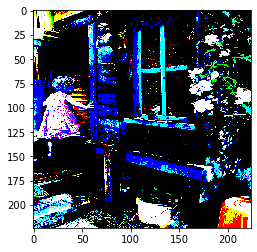

In [94]:
img=preprocess_img(img_path+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.show()

In [95]:
def encode_img(img):
    img=preprocess_img(img)
    feature_vector=model_new.predict(img)
    feature_vector=feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector
    

In [96]:
x=img_path+"1000268201_693b08cb0e.jpg"
print(x)
encode_img(x)

flickr8k/Flickr_Data/Flickr_Data/Images/1000268201_693b08cb0e.jpg



array([0.04154464, 0.17075905, 0.29276785, ..., 0.05094026, 0.3131964 ,
       0.8600726 ], dtype=float32)

### now we have to do encoding for each of the image and we have to save it

In [97]:
encoding_train={}
start=time()
for ix,img_id in enumerate(train):
    IMG_path=img_path+img_id+".jpg"
    encoding_train[img_id]=encode_img(IMG_path)
    
    
    if ix%100==0:
        print(" encoding in progress %d "%ix)
        
        
end_t=time()
#print("%d"%end_t-start)

 encoding in progress 0 


KeyboardInterrupt: 

#### storing it into a disk
#### pickle allows you to switch between Ram and file

In [98]:
with open("encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [237]:
encoding_test={}
start=time()
for ix,img_id in enumerate(test):
    IMG_path=img_path+img_id+".jpg"
    encoding_test[img_id]=encode_img(IMG_path)
    
    
    if ix%100==0:
        print(" encoding in progress %d "%ix)
        
        
end_t=time()
#print("%d"%end_t-start)

 encoding in progress 0 
 encoding in progress 100 
 encoding in progress 200 
 encoding in progress 300 
 encoding in progress 400 
 encoding in progress 500 
 encoding in progress 600 
 encoding in progress 700 
 encoding in progress 800 
 encoding in progress 900 


In [99]:
with open("encoded_test_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

### data preprocessing for the captions

### mapping words with numbers to feed into our model

In [100]:
word_to_idx={}
idx_to_word={}

for i,word in enumerate(total_words):
    word_to_idx[word]=i+1   ### mapping word with number
    idx_to_word[i+1]=word   ### then number with the word

### we have to add two special words

In [101]:
idx_to_word[1846]="startseq"
word_to_idx["startseq"]=1846

idx_to_word[1847]="endseq"
word_to_idx["endseq"]=1847

## from captions we have to find some max caption which can determine the batch_size

In [102]:
maxlen=0

for key in descriptions.keys():
    for cap in descriptions[key]:
        maxlen=max(maxlen,len(cap.split()))
        
print(maxlen)

33


## data loader

In [103]:
word_to_idx["in"]

1

In [104]:
idx_to_word[100]

'dirt'

In [105]:
def data_generator(train_descriptions,encoding_train,word_to_idx,maxlen,batch_size):
    X1,X2,y=[],[],[]
    
    n=0
    while True:
        for key,dec_list in train_descriptions.items():
            n+=1
            photo=encode_img(key+".jpg")
            for desc in dec_list:
                seq=[word_to_idx[word] for word in desc.split() if word in word_to_idx] ## converting list of numbers of the words which are present
                
                ### [13 46 64 83 19 ]
                ### len is 5
                ### so everytime we take one number more from the list
                ### 13
                ### 13 46
                ### 13 46 64 
                ### 13 46 83 19
                for i in range(1,len(seq)):
                    xi=seq[0:i]
                    yi=seq[i]
                   
                    ## xero is the padded word
                    
                    xi=pad_sequences([xi],maxlen=maxlen,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]  ### one hot vector for neural network
                    
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
                    
                if n==batch_size:
                    yield [[np.array(X1),np.array(X2)],np.array(y)]
                    
                    
                X1,X2,y=[]
                n=0
                    

In [141]:
f=open("./glove6b50dtxt/glove.6B.50d.txt",encoding='utf8')

In [142]:
embedding_index={}

for line in f:
    values=line.split()
    #print(values)
    #break
    word=values[0]
    word_embedding=np.array(values[1:],dtype='float')
    embedding_index[word]= word_embedding

In [203]:
vocab_size=1848

In [190]:
def get_Embedding_matrix():
    emd_dim=50
    vocab_size=1848
    matrix=np.zeros((vocab_size,emd_dim))
    
    
    for word,idx in word_to_idx.items():
        embedding_vector=embedding_index.get(word)  ##here you get the vector from the embedding_index
        
        if embedding_vector is not None:
            matrix[idx]=embedding_vector
            ### whatever be the idx of the word ,paste the embedding vector at that index
    return matrix

In [191]:
f.close()

In [192]:
embedding_index['kite']

array([-0.53284 , -0.014537, -0.18404 ,  0.54987 , -0.61098 ,  0.39327 ,
       -0.49495 , -0.51952 ,  0.78696 , -0.16896 ,  0.055488,  0.37429 ,
       -0.31054 ,  1.1719  , -0.39846 ,  0.13731 ,  0.6917  ,  0.21903 ,
       -1.7579  , -0.89281 , -0.46632 ,  0.34248 ,  0.22537 , -0.344   ,
        0.63632 , -0.42802 , -0.32488 ,  0.070891, -0.11279 , -0.56122 ,
        0.17763 ,  0.40187 , -0.27975 ,  1.3318  ,  0.11309 , -0.38383 ,
        0.33596 ,  0.37865 , -0.55863 ,  0.43565 ,  0.17027 ,  0.44203 ,
       -0.087287,  0.85622 ,  0.42661 , -0.057   ,  0.33    , -0.54549 ,
       -0.63598 ,  0.15724 ])

In [193]:
mat=get_Embedding_matrix()


### Model Architecture

In [206]:
input_img_f=Input(shape=(2048,)) ### the output of resnet is given to the input layer(with alreday extracted features)
inp_img1=Dropout(0.3)(input_img_f)
inp_img2=Dense(256,activation='relu')(inp_img1) ## output of previous to the input
## converting the 2048dim to 256 dim 


### captions

In [205]:
input_captions=Input(shape=(maxlen,))
inp_cap1=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2=Dropout(0.3)(inp_cap1)
inp_cap3=LSTM(256)(inp_cap2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [208]:
decoder1=add([inp_img2,inp_cap3]) ### one is from the image and the other is from the captions we have generated 
### and then we concatenate them
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vocab_size,activation='softmax')(decoder2)

################                             combined model #######################

model=Model([input_img_f,input_captions],outputs=outputs)
model.summary()
### nno parametre for add layer because we are just adding two layers


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 33)           0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 33, 50)       92400       input_7[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 2048)         0           input_8[0][0]                    
____________________________________________________________________________________________

### Important Thing -Embedding Layer(preintialise it )

In [209]:
model.layers[2].set_weights([mat])
model.layers[2].trainable=False


In [210]:
model.compile(loss='categorical_crossentropy',optimizer='adam')


### Training of the model